In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

## Independence, Revisited ##

In this section we will remind ourselves about what can happen to independence when parameters are randomized. First, let's go over some basics.

### Average Conditional Probabilities ###
Let $X$ have density $f_X$ and let $A$ be an event. Then

$$
P(A, X \in dx) ~ = ~ P(X \in dx)P(A \mid X = x) ~ \sim ~ f_X(x)dxP(A \mid X = x)
$$

So

$$
P(A) ~ = ~ \int_{\text{all x}} P(A, X \in dx) ~ = ~ \int_{\text{all x}} P(A \mid X = x)f_X(x)dx
$$

In more compact notation, $P(A) = E(P(A \mid X))$. This is an example of finding expectation by conditioning.

### One Toss of a Random Coin ###

Let $X$ have any density on the unit interval $(0, 1)$. Think of the value of $X$ as the the probability that a coin lands heads. Toss the coin once. Recall that our definition of "given $X=p$" means that

$$
P(\text{coin lands heads} \mid X = p) = p
$$

Let $X$ have density $f_X$. Then

$$
P(\text{coin lands heads}) ~ = ~ \int_0^1 p \cdot f_X(p)dp ~ = ~ E(X)
$$

Thus if $X$ is uniform on $(0, 1)$, then the chance that the coin lands heads is $1/2$. If $X$ has the beta $(r, s)$ distribution then the chance that the coin lands heads is $r/(r+s)$.

### Two Tosses of the Random Coin ###
Let $X$ be uniform on $(0, 1)$. Given $X = p$, toss a $p$-coin twice and observe the results of the tosses. 

We have just observed that $P(\text{first toss is a head}) = 1/2$. The first toss behaves like the toss of a fair coin. The same calculation shows that the chance that the second toss is a head (based on no knowledge of the first toss) is also $1/2$.

Now let's figure out the chance that both the tosses land heads. We know that $P(\text{both tosses are heads} \mid X = p) = p^2$. So

$$
P(\text{both tosses are heads}) ~ = ~ \int_0^1 p^2 \cdot 1dp ~ = ~ \frac{1}{3}
$$

That's *greater than* $1/4$ which is the chance of two heads given that you are tossing a fair coin twice. **The results of the two tosses are not independent.**

Let's see what's going on here. We know that

$$
\begin{align*}
P(\text{both tosses are heads}) ~ &= ~ P(\text{first toss is a head})
P(\text{second toss is a head} \mid \text{first toss is a head}) \\
&= ~ \frac{1}{2} P(\text{second toss is a head} \mid \text{first toss is a head})
\end{align*}
$$

Therefore

$$
P(\text{second toss is a head} \mid \text{first toss is a head}) ~ = ~ \frac{2}{3} ~ > ~ \frac{1}{2}
$$

Clearly, knowing that the first toss is a head is telling us something about $X$, which is then reflected is the chance that the second toss is also a head.

To quantify this idea, we will find the posterior density of $X$ given that the first toss is a head. Let $A$ be the event that the first toss is heads. The posterior density given this event is proportional to the prior times the likelihood of $A$. Thus it can be calculated as

$$
f_{X \vert A} (x) ~ \propto ~ 1 \cdot p
$$

This posterior density of $X$ given that the first toss is a head is not uniform. It rises linearly and puts more of its mass on values near 1 than near 0. 

This makes sense: given that the first toss is a head, we are more inclined to believe that the coin is biased towards heads than towards tails.

The constant of integration is easy to find. The posterior density given that the first toss is a head is $f_{X \vert A} (p) = 2p$ for $p \in (0, 1)$

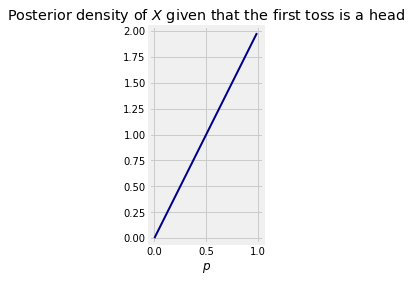

In [3]:
# NO CODE
plt.axes().set_aspect('equal')
p = np.arange(0, 1, 0.01)
plt.plot(p, 2*p, color='darkblue', lw=2)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 2.05)
plt.xlabel('$p$')
plt.title('Posterior density of $X$ given that the first toss is a head');

To double-check our earlier calculation, we can find $P(\text{second toss is a head} \mid \text{first toss is a head})$ using this posterior density. 

$$
\begin{align*}
P(\text{second toss is a head} \mid \text{first toss is a head}) 
~ &= ~ \int_0^1 p \cdot 2p \cdot dp \\
&= ~ \frac{2}{3}
\end{align*}
$$

This is consistent with our earlier calculation. 